In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('plotting')

In [8]:
sample = np.loadtxt('M31analogs_halo_props_TNG100_revised.txt') 
print(sample[0], len(sample))

ids = sample[:,0]
halo_mass = sample[:,7]*1e10/0.704
stellar_mass = sample[:,8]*1e10/0.704
vmax = sample[:,9]
subhalomass = np.loadtxt('M31analogs_halo_props_TNG100_revised_subhalomass.txt')[:,10]*1e10/0.704

[ 4.29041000e+05  3.07635352e+03  3.25153672e+04  3.90027686e+03
 -1.47242756e+01 -3.30249146e+02  1.10245094e+02  1.02576187e+02
  3.81455040e+00  2.17312149e+02] 98


Text(0.5, 0, '$M_{vir}\\, \\, [M_{\\odot}]$')

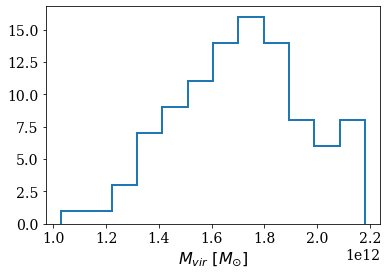

In [3]:
plt.figure()
plt.hist(halo_mass, bins = 12, histtype='step', lw=2)
plt.xlabel(r'$M_{vir}\, \, [M_{\odot}]$')

Text(0.5, 0, '$M_{*}\\, \\, [M_{\\odot}]$')

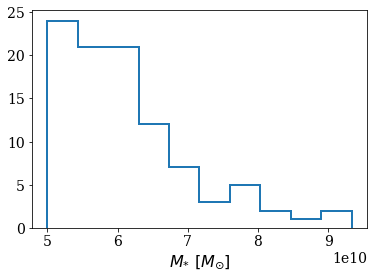

In [4]:
plt.figure()
plt.hist(stellar_mass, bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{*}\, \, [M_{\odot}]$')

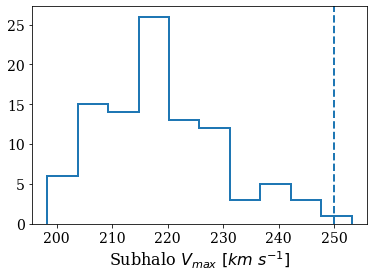

In [5]:
plt.figure()
plt.hist(vmax, bins = 10, histtype='step', lw=2)
plt.xlabel(r'Subhalo $V_{max}\,\, [km \, \, s^{-1}]$')
plt.axvline(x=250, ls='--')

In [10]:
mergers = np.loadtxt('M31analogs_merger_props_TNG100_revised.txt')
all_ids = mergers[:,0]
mask = np.in1d(all_ids, ids) #create mask of ids in the primary sample and apply to these properties
last_maj = mergers[:,2][mask]
num_maj = mergers[:,3][mask]
num_min = mergers[:,4][mask]
print(len(last_maj))

98


7.950232596370229


(-0.2, 14.0)

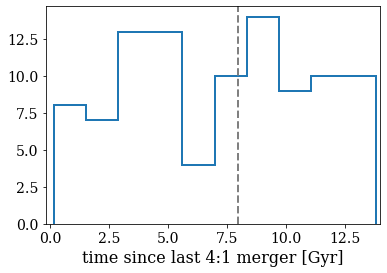

In [15]:
plt.figure()
plt.hist(last_maj, bins=10, histtype='step', lw=2)
plt.xlabel('time since last 4:1 merger [Gyr]')
print(np.median(last_maj))
plt.axvline(x=np.median(last_maj), ls='--', color='gray')
plt.xlim(-0.2,14.)

6.0 5.0 11.0 20.0


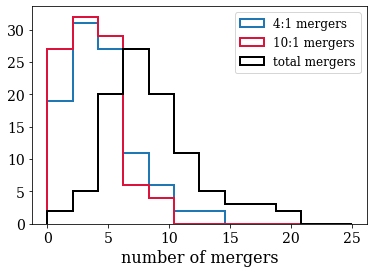

In [11]:
plt.figure()
tot = num_maj+num_min
print(num_maj[0], num_min[0], tot[0], np.max(tot))
plt.hist(num_maj, bins=12, range=(0,25), histtype='step', lw=2, label='4:1 mergers')
plt.hist(num_min, bins=12, range=(0,25), histtype='step', color='crimson', lw=2, label='10:1 mergers')
plt.hist(tot, bins=12,range=(0,25), histtype='step', color='k', lw=2, label='total mergers')
plt.xlabel('number of mergers')
plt.legend(loc='upper right')

98


Text(0.5, 0, '$M_{sub}\\, \\, [M_{\\odot}]$')

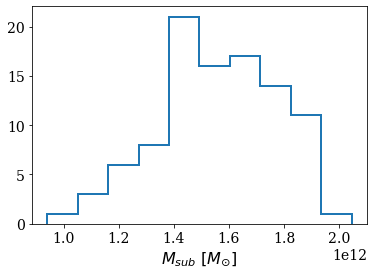

In [14]:
#apply mask here too
plt.figure()
print(len(subhalomass[mask]))
plt.hist(subhalomass[mask], bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{sub}\, \, [M_{\odot}]$')